# Unit 2 Project


**Intoduction**

In this project, I want to find a value for the percentage of kickoffs that get returned and don't end in a touchback with the new nfl kickoff rules. I use last years nfl kickoff data and my own predictions to figure out my prior and I use kickoff stats from week 1 of the nfl this year as my likelihood.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 762.2 kB/s eta 0:00:00
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 647.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 505.6/505.6 kB 17.4 MB/s eta 0:00:00
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.0
    Uninstalling nbclient-0.10.0:
      Successfully uninstalled nbclient-0.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency

<Axes: >

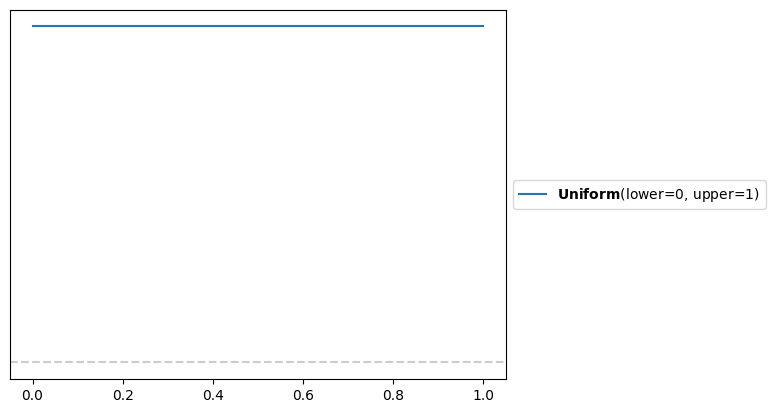

In [1]:
!pip install "preliz[full,notebook]"
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm
pz.Uniform(0,1).plot_pdf()



**Prior**




total kickoffs 2023 nfl season - 2698.        
total returns 2023 nfl season - 590.      
The return rate of nfl kickoffs in the 2023 season was 21.9%. I believe that with the new dynamic kickoff that return rate will jump 10% to 31.9%. I plot my prior using a beta distribution.

<Axes: >

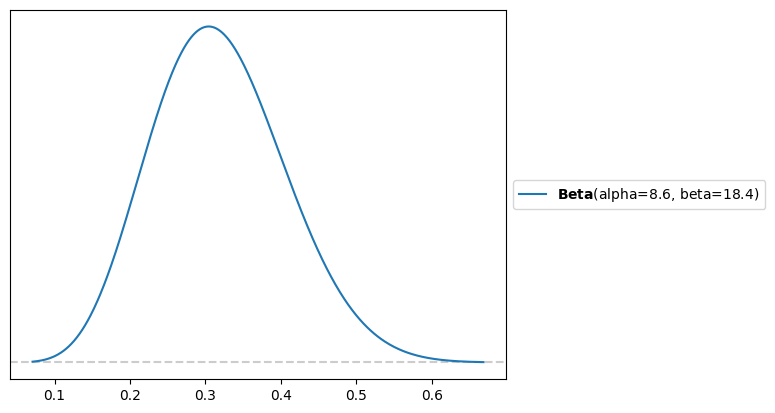

In [2]:
#plotting the beta distribution of my prior
DKRR_prior = pz.Beta(alpha=8.60,beta=18.38)
DKRR_prior_mode = (DKRR_prior.alpha -1)/(DKRR_prior.alpha + DKRR_prior.beta - 2)
DKRR_prior.mean(), DKRR_prior.median(), DKRR_prior_mode
DKRR_prior.plot_pdf()

**Likelihood**

For my likelihood, in week 1 of the nfl season with the new dynamic kickoff there were 114 valid kickoffs with 57 returns. I plot my likelihood using a binomial distribution.

<Axes: >

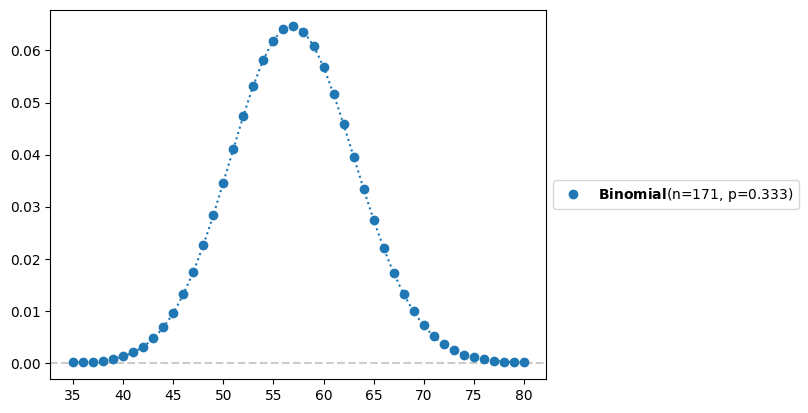

In [3]:
#plotting binomial distribution of my likelihood
pz.Binomial(n=171, p=57/171).plot_pdf()

**Analytic**

I then find my analytic graph by combining my prior and likelihood data into a beta distribution.

<Axes: >

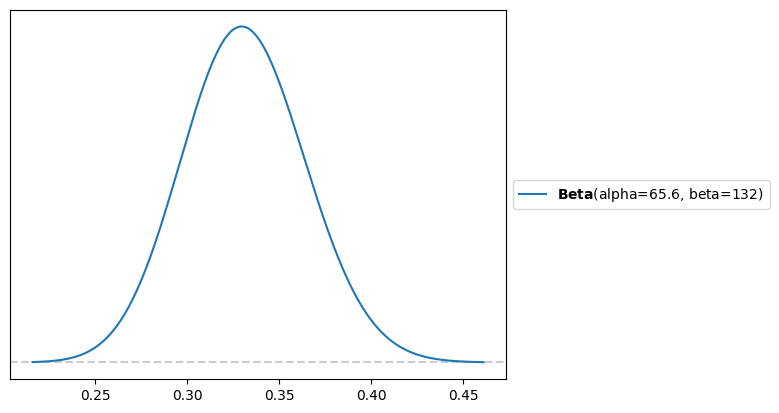

In [4]:
analytic_DKRR = pz.Beta(alpha=8.60+57,beta=18.38+114)
analytic_DKRR.mean()
analytic_DKRR.plot_pdf()

**Model**

I then use a pymc model and my prior and likelihood to create my posterior.

In [5]:
DKRR_returns = np.repeat(1,57)
DKRR_others = np.repeat(0,114)
DKRR_data = np.concatenate([DKRR_returns,DKRR_others])
with pm.Model() as DKRR_model:
  #define the prior
  theta = pm.Beta('theta' , alpha=8.60 , beta=18.38)
  #define the likelihood
  y = pm.Bernoulli('y', p = theta, observed = DKRR_data)
  #create samples using our posterior
  idata_DKRR = pm.sample(1000)

<Axes: title={'center': 'theta'}>

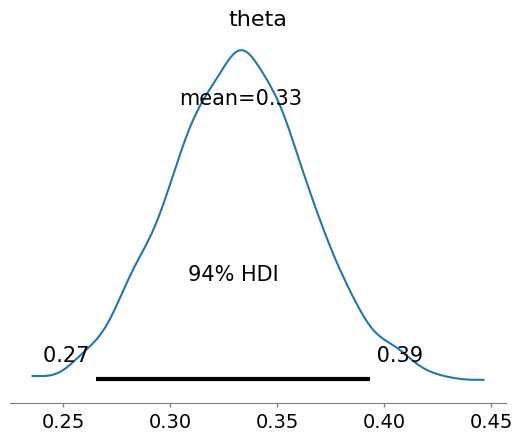

In [6]:
az.plot_posterior(idata_DKRR)

**Posterior**

Using the pymc model I took 1000 samples of a nfl kickoff under the new dynamic kickoff rules and graphed the probability that they were returned. Using my prior, likelihood, and the pymc model I am able to see from the graph above that it is most probable that 33% of the kickoffs will be returned under the new dynamic kickoff rules in the nfl. This is close to my prediction in my prior which was 31.9%.